# Correlation of Gross Revenue From Movie Dataset

Throughout this analysis, we will discover which columns in the have a high impact on the gross revenue of each movie

The analysis will be divided in multiple sections:

- Imported Libraries, Packages, and Data
- Data Cleaning and Preprocessing
- Correlation Analysis
- Results and Findings

 ## Import Libraries, Packagesm and Data

In [45]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjusts configuration of the plots we will create

In [46]:
# Read data

df = pd.read_csv(r"C:\Users\khang\Downloads\movies.csv")

In [47]:
# View data 

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


## Data Cleaning and Preprocessing

Before analyzing the data, multiple steps have to be taken to clean the data:

- Handle missing values
- Discover the data types for our columns
- Remove extra decimals from budget column
- Extract the year from released column and use it as year
- Finding duplicates and dropping them

In [48]:
# Let's see if there is any missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [49]:
# Discover the data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [118]:
# Remove decimals from budget and gross column

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [51]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [131]:
# Create correct year column

df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,NaN
1,The Blue Lagoon,R,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,NaN
2,Star Wars: Episode V - The Empire Strikes Back,PG,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,NaN
3,Airplane!,PG,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,NaN
4,Caddyshack,R,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,NaN


In [120]:
# Order records by descending gross

df.sort_values(by=['gross'], inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,NaN
7244,Avengers: Infinity War,PG-13,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,NaN
7480,The Lion King,PG,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,NaN
6653,Jurassic World,PG-13,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,NaN
6043,The Avengers,PG-13,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,6,2006,2392,6.3,12000.0,1563,2397,788,55,1000000,0,396,77.0,NaN
7667,Tee em el,NaN,10,2020,391,5.7,7.0,2165,3344,2463,44,0,0,1787,102.0,NaN
3045,Titanic,PG-13,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,-2147483648,2253,194.0,NaN
7445,Avengers: Endgame,PG-13,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,-2147483648,1606,181.0,NaN


In [60]:
# Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


## Correlation Analysis


After the data is cleaned, we can now find what variables are correlated to the gross revenue


My hypothesis is that these variables will have high correlation:

- Budget
- Company

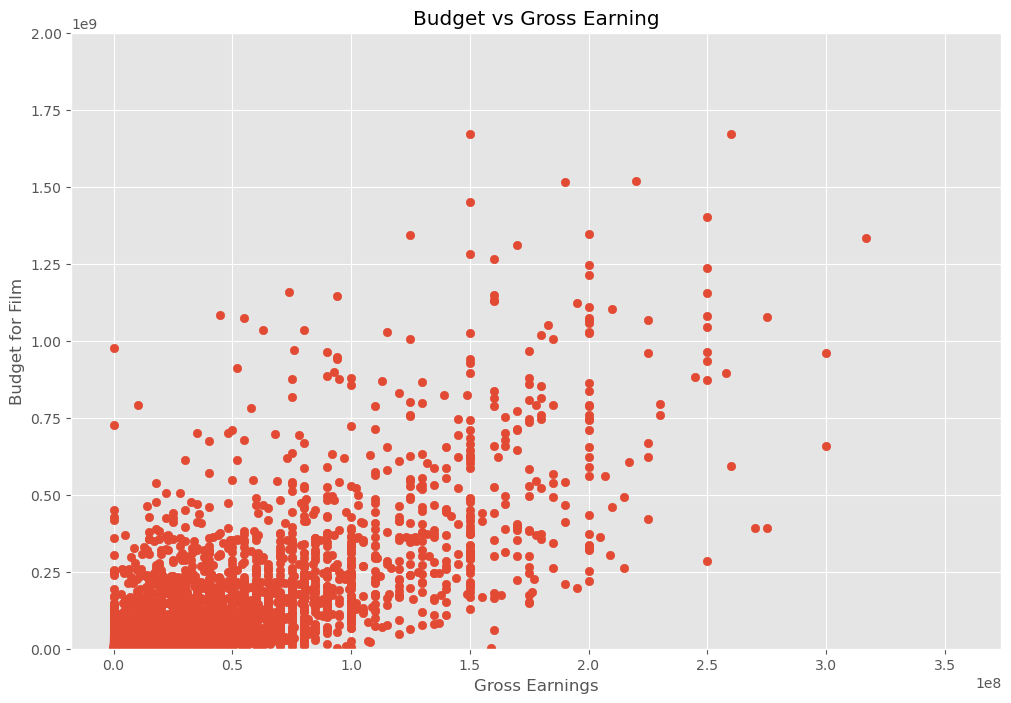

In [77]:
# Scatterplot with budget vs gross revenue

plt.scatter(x=df.budget, y=df.gross);

plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.ylim(0,2e9);

## Using a regression plot on seaborn


The regplot() method creates a scatterplot and a line at the same time

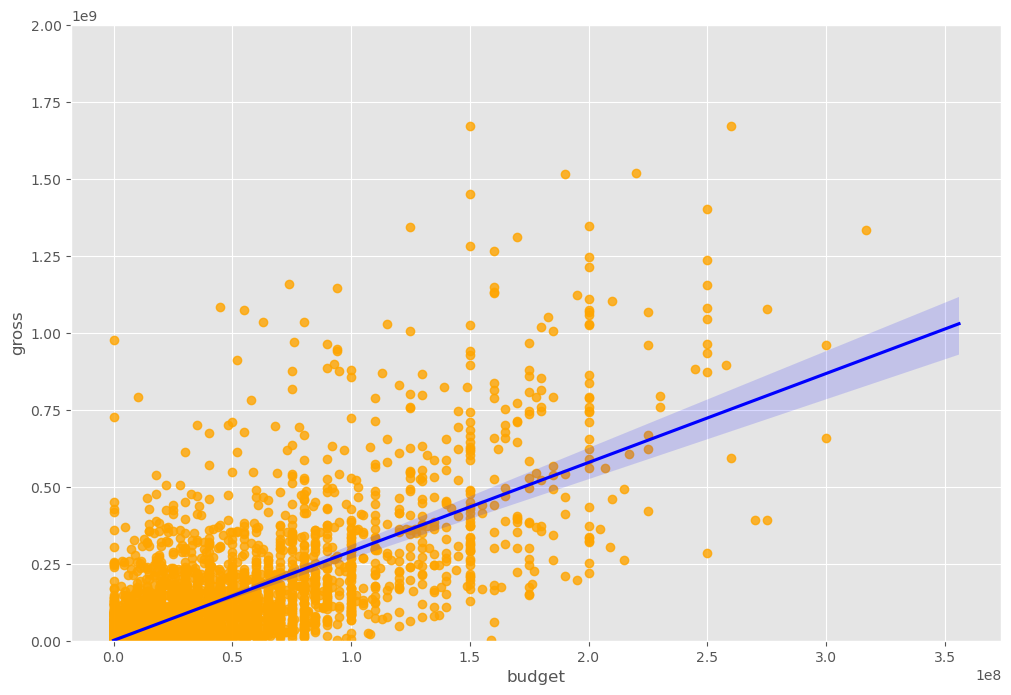

In [83]:
# Plot budget vs gross using seaborn

sns.regplot(x=df.budget, y=df.gross, data=df, 
            scatter_kws={'color': 'orange'}, # Change scatters to orange
            line_kws={'color': 'blue'}) # Change line color to blue
plt.ylim(0,2e9); # Set y limit

Now we can determine the actual correlation 

In [91]:
# Start looking at correlation

df.corr() # pearson, kendall, spearman

C:\Users\khang\AppData\Local\Temp\ipykernel_34500\1205604139.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


There was a high correlation between budget and gross

## Visualize the correlation with seaborn heatmap

After creating the correlation matrix, we can now visualize which variables are highly correlated to the gross revenue

In [102]:
# Assign correlation matrix

corr_matrix = df.corr()

C:\Users\khang\AppData\Local\Temp\ipykernel_34500\2606126813.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


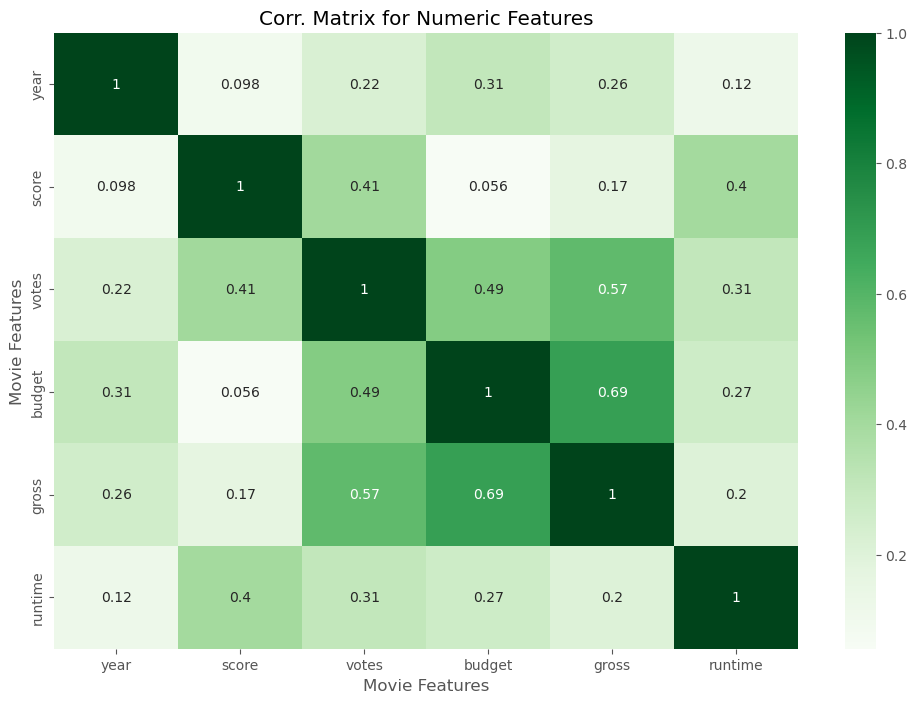

In [106]:
# Create seaborn heatmap using the corr_matrix

sns.heatmap(corr_matrix, annot=True, cmap='Greens'); # Annot displays number alonsgide color

plt.title('Corr. Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

###  See if company has a correlation with gross revenue

We can now move onto the company column to see if there is any correlation to the gross revenue

In [113]:
# look at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [116]:
# Turn columns into numeric columns

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,The Blue Lagoon,R,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,Star Wars: Episode V - The Empire Strikes Back,PG,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,Airplane!,PG,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,Caddyshack,R,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,0,-1,90.0,42
7664,Dream Round,NaN,4,2020,1107,4.7,36.0,774,2614,1886,55,0,0,539,90.0,42
7665,Saving Mbango,NaN,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,0,941,NaN,42
7666,It's Just Us,NaN,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,0,-1,120.0,42


C:\Users\khang\AppData\Local\Temp\ipykernel_34500\542781515.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_numerized.corr()


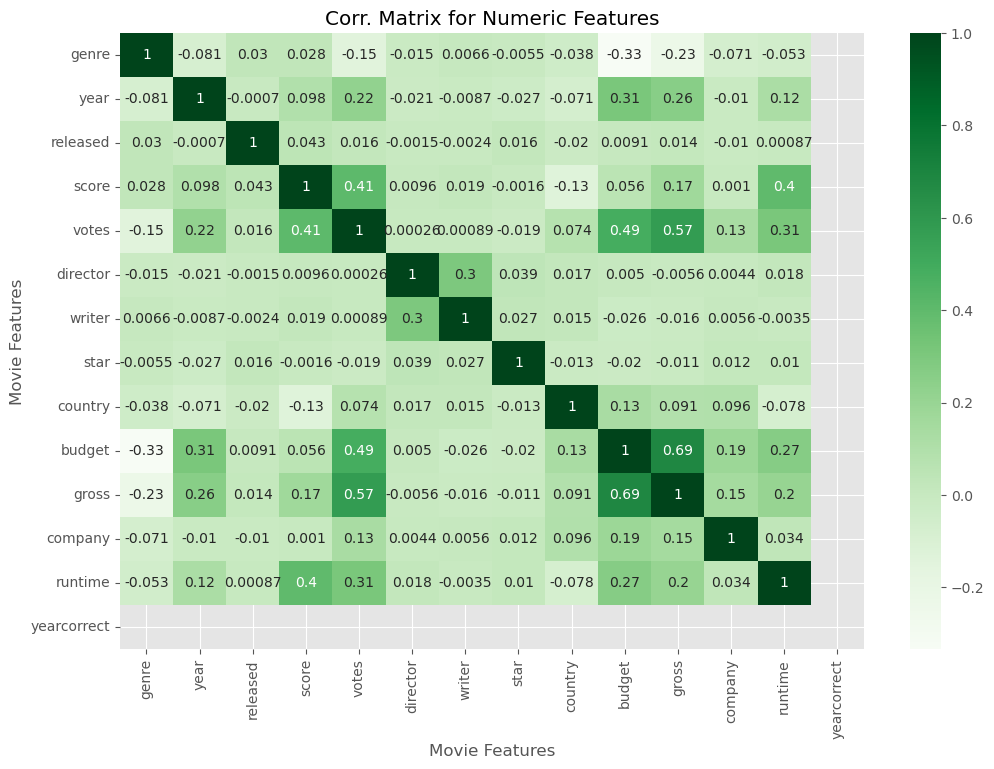

In [123]:
# Create correlation matrix for new df_numerized dataframe
corr_matrix = df_numerized.corr()

sns.heatmap(corr_matrix, annot=True, cmap='Greens'); # Annot displays number alonsgide color

plt.title('Corr. Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [124]:
df_numerized.corr()

C:\Users\khang\AppData\Local\Temp\ipykernel_34500\1284351489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_numerized.corr()


,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
genre,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052711,NaN
year,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.120811,NaN
released,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.014154,-0.010474,0.000868,NaN
score,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.001030,0.399451,NaN
votes,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.573889,0.133204,0.309212,NaN
director,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017624,NaN
writer,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.003511,NaN
star,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.010174,NaN
country,-0.037615,-0.070938,-0.020427,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.131720,0.091404,0.095548,-0.078412,NaN
budget,-0.334021,0.309212,0.009145,0.055665,0.486862,0.004976,-0.025911,-0.019952,0.131720,1.000000,0.687124,0.186474,0.269510,NaN


In [129]:
# Create correlation matrix that we can later sort to see which columns have the highest correlation with gross

corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

C:\Users\khang\AppData\Local\Temp\ipykernel_34500\1449143625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_numerized.corr()


genre        genre          1.000000
             year          -0.081261
             released       0.029822
             score          0.027965
             votes         -0.145307
                              ...   
yearcorrect  budget              NaN
             gross               NaN
             company             NaN
             runtime             NaN
             yearcorrect         NaN
Length: 196, dtype: float64

In [130]:
# Divide the correlation variables into seperate pairs

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.229534
gross        genre         -0.229534
votes        genre         -0.145307
                              ...   
yearcorrect  budget              NaN
             gross               NaN
             company             NaN
             runtime             NaN
             yearcorrect         NaN
Length: 196, dtype: float64

In [128]:
# Only output values with correlations higher than 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.573889
gross     votes       0.573889
          budget      0.687124
budget    gross       0.687124
genre     genre       1.000000
writer    writer      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

## Results and findings
 
It seems as though Votes and Budget have the highest correlation to gross revenue.

- Votes has a 0.57 correlation score with Gross
- Budget has a 0.68 correlation score with Gross


We seemed to be wrong about our inference that company would have a high correlation with gross revenue.